In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys,os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.getcwd(), '../'))
# from hardware.slm import SLM
from hardware.camera import NITCam
from hardware.waveshaper import Waveshaper
from hardware.yokogawa_osa import YokogawaOSA


In [ ]:
camera = NITCam()
camera.bitDepth = 14
camera.exposure_time = 100
# camera.analog_gain = "High"
# camera.FPS = 10
camera.frame_width = 256#424#432
camera.frame_height = 256#320#424#432
camera.offset_x = 32#320#496
camera.offset_y = 0#252#212
camera.connect()
camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_100us.yml')


Observer initialized


In [5]:
camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_100us.yml')



In [43]:
camera.disconnect()

In [13]:
# camera.frame_width = 440
# camera.frame_height = 440
# camera.offset_x = 496
# camera.offset_y = 128

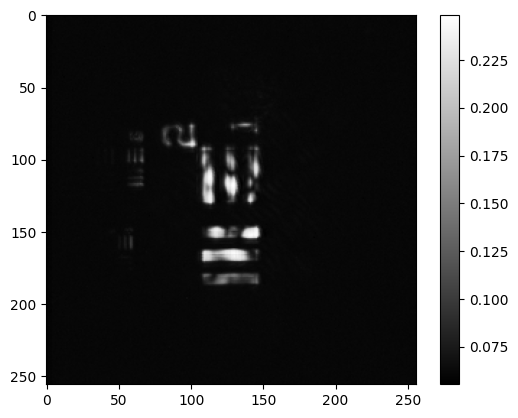

In [6]:
# camera.setNUCfile(r'c:\Maodong\NTT_code_Maodong\hardware\NUCs\NUC_100us.yml')
single_frame = camera.capture_single_frame(save_log=False)
camera.plot_frame(single_frame)

In [57]:
sc.camera.disconnect()

In [30]:
# camera.grid_config.matrixsize_0 = 10
# camera.grid_config.matrixsize_1 = 6
# camera.grid_config.elem_width = 10
# camera.grid_config.elem_height = 10
# camera.grid_config.gap_x = 2
# camera.grid_config.gap_y = 2
# camera.grid_config.topleft_x = 1
# camera.grid_config.topleft_y = 1

# camera.grid_config.plot_rect_array(single_frame)

In [7]:
from hardware.toptica_laser import TopticaLaser
dlc = TopticaLaser()
dlc.connect()

In [7]:
dlc.laser1.wide_scan.stop()

In [8]:
dlc.laser1.wide_scan.state.get()

0

In [8]:
dlc.laser1.ctl.wavelength_set.set(1629)

0

In [24]:
dlc.get_time_avged_value()

1629.779762307613

In [9]:
from experiments.speckle_collector import SpeckleCollector
sc = SpeckleCollector(camera, dlc)

In [10]:
sc.laser.connect()
sc.camera.connect()

In [10]:
sc.camera.setNUCfile(r'C:\Users\think\Desktop\NUCFactory_100us.yml')

0.23414515 0.054385643


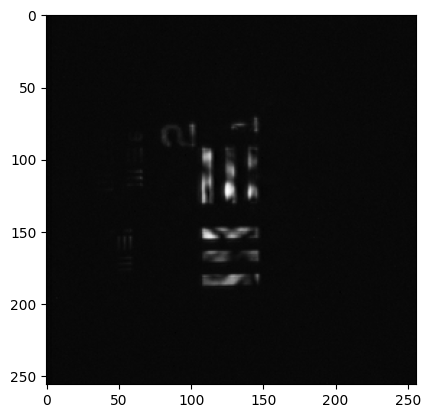

In [12]:
tt = sc.collect_wl_pattern(1511.)
plt.imshow(tt, cmap='gray')
print(np.max(tt), np.min(tt))

0.15204786 0.048464872


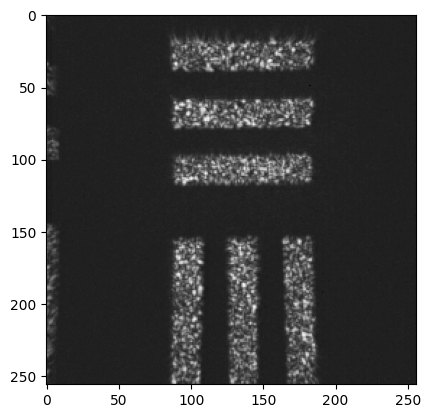

In [32]:
tt = sc.collect_wl_pattern(1629.)
plt.imshow(tt, cmap='gray')
print(np.max(tt), np.min(tt))

In [11]:
np.max(tt)

0.16700238

In [35]:
sc.wl_tol_nm

0.0016027771348490205

In [72]:
wl_start = 1545
wl_end = 1565
step_MHz = 1e3
filename = r'Z:\Maodong\Projects\Speckle\OverNight\Pattern_20241015_MMFand120DF\dataset2_%d_%d_%dGHz\pattern_%d_%d_%dGHz_New' % (wl_start, wl_end, step_MHz/1e3, wl_start, wl_end, step_MHz/1e3)

sc.scan_wl_pattern(wl_start, wl_end, step_MHz=step_MHz, filename = filename)
sc.info('Data collection finished, saved to %s' % filename)

# Initial Test of Imaging

In [13]:
from hardware.rs_oscilloscope import RsOSC
osc = RsOSC()
osc.connect()

In [14]:
osc.get_avg_voltage(1)

0.09514529546722769

0.25740096


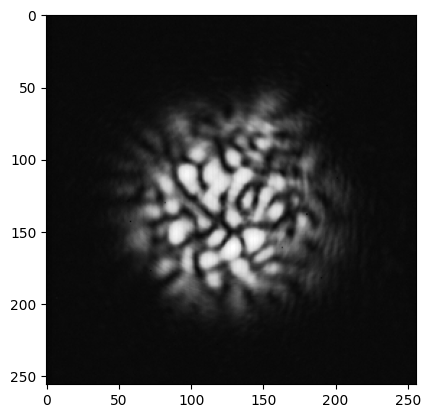

In [16]:
tt = sc.collect_wl_pattern(1629.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

0.23426723


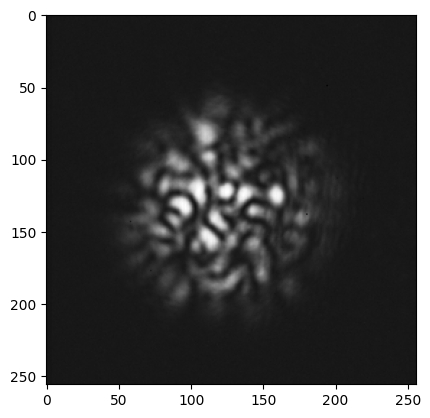

In [17]:
tt = sc.collect_wl_pattern(1511.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

0.121467374


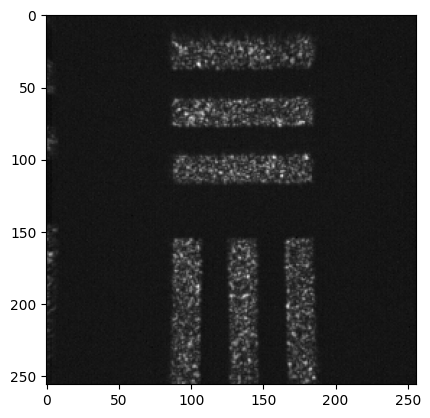

In [38]:
tt = sc.collect_wl_pattern(1511.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

0.12549594


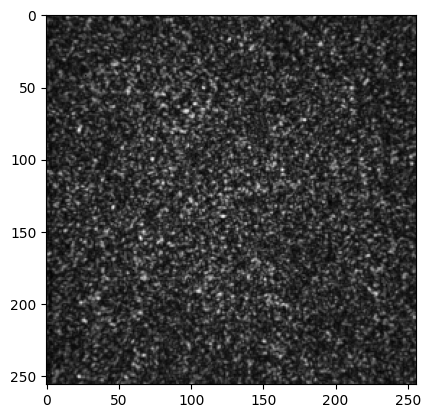

In [40]:
tt = sc.collect_wl_pattern(1511.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

In [43]:
camera.connect()

0.8031496


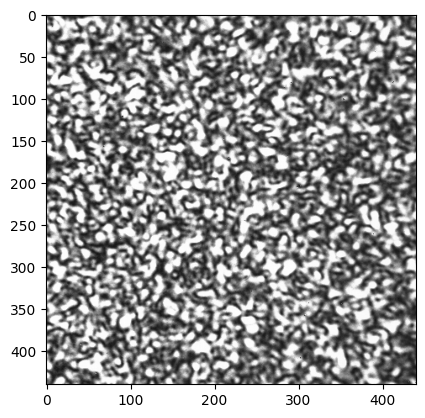

In [54]:
tt = sc.collect_wl_pattern(1625.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

0.80717814


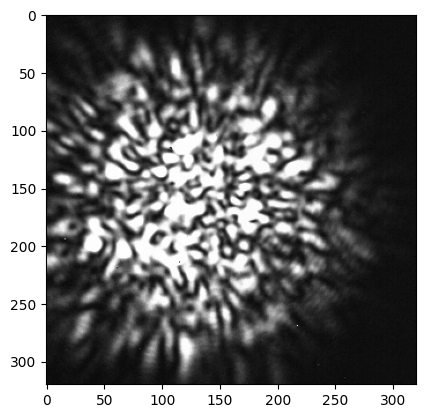

In [58]:
tt = sc.collect_wl_pattern(1511.)
plt.imshow(tt, cmap='gray')
print(np.max(tt))

In [18]:
wl_start = 1511
wl_stop = 1629.9
step_MHz = 20e3
# step_MHz = 1500e3
# callback = lambda : [osc.get_avg_voltage(channel=1)]

import time
def callback():
    time.sleep(1)
    return [osc.get_avg_voltage(channel=1)]

filename = r'C:\Maodong\Temp_Data\Imaging_20241108_MMFand1500DF\dataset1_withoutobj_%d_%d_%dGHz\pattern_%d_%d_%dGHz' % (wl_start, wl_stop, step_MHz/1e3, wl_start, wl_stop, step_MHz/1e3)
sc.scan_wl_pattern(wl_start, wl_stop, step_MHz=step_MHz, filename = filename, callback = callback)

sc.info('Imaging finished, saved to %s' % filename)

# make a beep
import winsound
winsound.Beep(1500, 500)

100%|██████████| 724/724 [51:02<00:00,  4.23s/it]


In [77]:
sc.laser.laser1.ctl.wavelength_set.get()

1630.0

In [19]:
# text to voice
import pyttsx3
engine = pyttsx3.init()
for _ in range(3): 
    engine.say('Imaging finished.')
    engine.runAndWait()

In [ ]:
# repeat the voice



In [18]:
camera.connect()

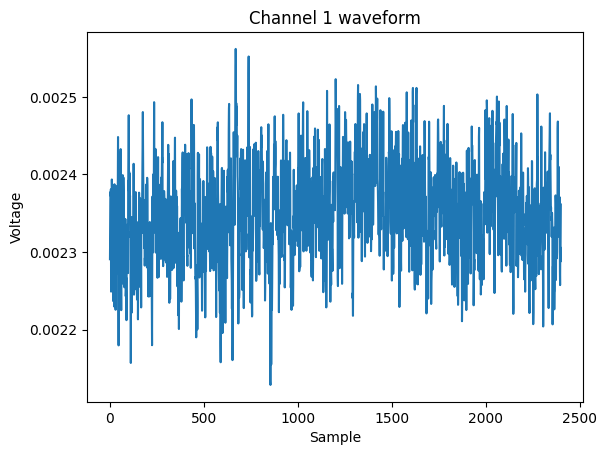

In [20]:
trace_background = osc.get_trace(channel=1)
np.array(trace_background).tofile(r'C:\Maodong\Temp_Data\Imaging_20241108_MMFand1500DF\Background_20241108.csv')
import json
with open(r'C:\Maodong\Temp_Data\Imaging_20241108_MMFand1500DF\Background_20241108.json', 'w') as f:
    json.dump({'background': trace_background}, f)

In [34]:
np.array(trace_background).tofile(r'C:\Maodong\Temp_Data\Imaging_20241022_MMFand120DF\Background_20241022_MMFand120DF.dat')

In [215]:
camera.config

{'bitDepth': 14,
 'ExposureTime': 100,
 'Analog_gain': 'Low',
 'FPS': 30,
 'offset_x': 496,
 'offset_y': 212,
 'width': 424,
 'height': 424,
 'NUC_path': 'c:\\Maodong\\NTT_code_Maodong\\hardware\\NUCs\\NUC_100us.yml'}

In [11]:
sc.laser.laser1.ctl.wavelength_max.get()

1630.0

In [2]:
[print('done') for i in range(10)]

done
done
done
done
done
done
done
done
done
done


[None, None, None, None, None, None, None, None, None, None]

In [61]:
camera.grid_config.matrix_from_image(single_frame)

array([[0.31657693, 0.31595433, 0.31663981, 0.31644571, 0.31665748,
        0.31711772],
       [0.31660378, 0.31592688, 0.31630409, 0.31649575, 0.31643409,
        0.31697613],
       [0.31614357, 0.31598851, 0.31663245, 0.31651101, 0.31633705,
        0.31702617],
       [0.31624794, 0.31581578, 0.31631812, 0.316522  , 0.31619912,
        0.31684184],
       [0.31601596, 0.31613317, 0.31656045, 0.31608069, 0.31635416,
        0.31684551],
       [0.31610876, 0.31567845, 0.31630287, 0.31633338, 0.31619483,
        0.31676614],
       [0.31602758, 0.31535187, 0.31609595, 0.31606236, 0.31614417,
        0.31657693],
       [0.31608558, 0.31575656, 0.31630471, 0.31627724, 0.31592381,
        0.31671792],
       [0.31611794, 0.31561741, 0.31624305, 0.31633705, 0.31611732,
        0.31669533],
       [0.31595433, 0.31548738, 0.31617528, 0.31612828, 0.31599462,
        0.31661841]])

In [62]:
single_frame

array([[0.31654763, 0.3205762 , 0.31795153, ..., 0.31813467, 0.32332295,
        0.32173595],
       [0.3141671 , 0.31593725, 0.31850088, ..., 0.3164866 , 0.32222426,
        0.31966063],
       [0.31544894, 0.31886712, 0.31880608, ..., 0.3153879 , 0.32204115,
        0.3192944 ],
       ...,
       [0.31361777, 0.31587622, 0.31605932, ..., 0.31587622, 0.32234633,
        0.31892815],
       [0.31410608, 0.3145944 , 0.3169749 , ..., 0.31550997, 0.32484892,
        0.31917232],
       [0.31435025, 0.3150827 , 0.3148996 , ..., 0.31734115, 0.3206983 ,
        0.31801257]], dtype=float32)

In [48]:
single_frame.shape

(240, 120)

In [12]:
from hardware.toptica_laser import TopticaLaser
dlc = TopticaLaser()

In [13]:
dlc.connect()

In [14]:
dlc.laser1.ctl.wavelength_act.get()

1554.9846014371276

In [44]:
from hardware.keysight_fg import KeysightFG
fg = KeysightFG()
fg.connect()

1

In [45]:
fg.get_channel_amplitude(1)

0.1

In [11]:
import toptica.lasersdk as lasersdk
import toptica.lasersdk.dlcpro.v2_4_0 as dlcsdk
from toptica.lasersdk import decop, client

connection = dlcsdk.NetworkConnection("192.168.1.18")
client = client.Client(connection)
dlc = dlcsdk.DLCpro(connection)

In [12]:
dlc.open()

In [46]:
dlc.laser1.ctl.wavelength_act.get()

1560.000493526488

In [24]:
dlc.laser1.ctl.wavelength_set.set(1560.0)

0

In [34]:
dlc.close()

In [8]:
import os
os.rename(r'C:\Maodong\Temp_Data\test_2', r'C:\Maodong\Temp_Data\test')